# Data Cleanup

## Necessary Steps

1. Understand the data structure: Look through the database, understand the main structure, i.e., what each row represents, and what columns and types of information are available
2. Merge game file to add in week identifier to the new dataset (games.csv is in '1. Additional Data File')
3. Create column categorizations to filter dataset for relevant purposes
4. Break down receiver into its individual row
5. Create playmaker column, and check id uniqueness - check that one ID corresponds to one name
6. Flag non-relevant plays - add a binary column that flags 1 for run, pass, reception, FG/XP, 0 for all others
7. Add any additional stat needed - reception (for plays that fall under 'reception'), target ('reception', 'pass')
8. Add position based off of the highest stat of a player. Position will be refined later with web scraping
9. Ensure that stat are correctly represented for a given position
10. Verify top 50 stats against the reported ones


## Setup Environment

In [4]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
pd.set_option('display.max_columns', None)

## 1. Upload Data

In [ ]:
'''
Not sure why your folder names were changes. The working directory of this file is where its source code is located
so you can specify directories relatively
'''

In [5]:
# Store your files in the same folder as the source code, so you don't have to specify the directory
df_file_2019 = "../../1. Raw-Data/data2019.csv"
df_file_game = "../1. Additional-Data/games.csv"

# Use the convention df for dataframes
df1 = pd.read_csv(df_file_2019)
df_games = pd.read_csv(df_file_game)

/Users/royaharon/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (168,169,170,171,176,177,180,181,184,185,190,191,192,193,196,197,205,206,207,220,221,222,223,224,225,228,229,233,234,235,240,242,243) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Add in Weekly Identifier

In [ ]:
'''
In each play row the week of that game will be displayed as a new column.
This will be done through a merge along the game_id column from the game.csv file. 
'''

In [6]:
df = df1.merge(df_games[["game_id", "week"]], on = 'game_id')

df

,Unnamed: 0,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_pla

## 3. Create Categorization Lists

In [ ]:
'''
The columns in the 2019 data file are arranged into categorical lists.
Many of the lists can be automated due to the presence of key words in their title.
'''

### 3.1 Main Lists

In [56]:

key = ['Flag', 'Playmaker_id', 'Playmaker_name', 'play_id', 'game_id', 'home_team', 'away_team', 'week', 'game_date', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'play_type']


pass_play = ['pass_length','pass_location','air_yards']
run_play = ['run_location', 'run_gap']
yard_info = ['yrdln','ydstogo','ydsnet','yards_gained', "fumble_recovery_1_yards", "fumble_recovery_2_yards", "return_yards"]

receiver_info = [col for col in df.columns if 'receiver' in col]
receiver_info += ['yards_after_catch', 'incomplete_pass', 'complete_pass', 'touchdown', 'pass_touchdown', 'fumble_lost', 'Playmaker_id', 'Playmaker_name']


passer_info = [col for col in df.columns if 'passer' in col]


passer_info += ['yards_after_catch', 'incomplete_pass', 'complete_pass', 'touchdown', 'pass_touchdown', 'fumble_lost', 'Playmaker_id', 'Playmaker_name', 'interception']


rusher_info = [col for col in df.columns if 'rusher' in col]
rusher_info += ['touchdown', 'fumble_lost', 'Playmaker_id', 'Playmaker_name']

two_pt_con


xp = ['field_goal_result', 'kick_distance', 'extra_point_result', 'kicker_']



### 3.2 Other Lists

In [57]:

game_time_info = ['quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'time']

gen_play_info = ['drive', 'sp', 'down', 'goal_to_go','desc','play_type','shotgun','no_huddle','qb_dropback','qb_kneel','qb_spike','qb_scramble']

team_info = ["return_team", 'td_team', 'posteam_time', 'defteam_time', 'total_home_score','total_away_score', 'posteam_score_post','defteam_score_post', 'score_differential', "forced_fumble_player_1_team", "forced_fumble_player_2_team", "solo_tackle_1_team", "solo_tackle_2_team", "assist_tackle_1_team", "assist_tackle_2_team", "assist_tackle_3_team", "assist_tackle_4_team", "fumbled_1_team", "fumbled_2_team", "fumble_recovery_1_team", "fumble_recovery_2_team"]

game_info = ['play_id','game_id','home_team','away_team','posteam','posteam_type', 'defteam', 'side_of_field', 'yardline_100','game_date', "year"]


prob_cols = [col for col in df.columns if 'prob' in col]

penalty_info = [col for col in df.columns if 'penalty' in col]


kickoff_punt_info = [col for col in df.columns if 'kickoff' in col]

kickoff_punt_info += [col for col in df.columns if 'kicker' in col]
kickoff_punt_info += [col for col in df.columns if 'punt' in col]


defensive_info = [col for col in df.columns if 'defensive' in col]

defensive_info += [col for col in df.columns if 'fumble' in col]
defensive_info += [col for col in df.columns if 'sack' in col]
defensive_info += [col for col in df.columns if 'interception' in col]
defensive_info += [col for col in df.columns if 'defense' in col]

epa_info = [col for col in df.columns if 'epa' in col]

wpa_info = [col for col in df.columns if 'wpa' in col]

touchdown_info = [col for col in df.columns if 'touchdown' in col]

timeout_info = [col for col in df.columns if 'timeout' in col]

wp_info = [col for col in df.columns if 'wp' in col]

score_info = [col for col in df.columns if 'score' in col]

tackle_info = [col for col in df.columns if 'tackle' in col]

all_lists = [game_info, team_info, game_time_info ,xp, wpa_info, epa_info, touchdown_info, yard_info, run_play, pass_play, key, prob_cols, penalty_info, kickoff_punt_info, defensive_info, timeout_info, passer_info, receiver_info, rusher_info, score_info, tackle_info]

big_list = [item for elem in all_lists for item in elem]

remainder_list = [col for col in df.columns if col not in big_list]

['passer_player_id',
 'passer_player_name',
 'interception',
 'interception_player_id',
 'interception_player_name',
 'lateral_interception_player_id',
 'lateral_interception_player_name',
 'yards_after_catch',
 'incomplete_pass',
 'complete_pass',
 'touchdown',
 'pass_touchdown',
 'fumble']

## 4. Receiver row creation

In [ ]:
'''
For each pass play, creat an additional row for the recepetion
so that there can be two play makers (the passer and the receiver).
'''

In [7]:
new_df = pd.DataFrame()
new_df = df[(df['play_type']=="pass")]

new_df['play_type'].replace({'pass': 'reception'}, inplace=True)

df = pd.concat([df, new_df], sort= True)

df

/Users/royaharon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Unnamed: 0,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,away_team,away_timeouts_remaining,away_wp,away_wp_post,blocked_player_id,blocked_player_name,comp_air_epa,comp_air_wpa,comp_yac_epa,comp_yac_wpa,complete_pass,def_wp,defensive_extra_point_attempt,defensive_extra_point_conv,defensive_two_point_attempt,defensive_two_point_conv,defteam,defteam_score,defteam_score_post,defteam_timeouts_remaining,desc,down,drive,ep,epa,extra_point_attempt,extra_point_prob,extra_point_result,fg_prob,field_goal_attempt,field_goal_result,first_down_pass,first_down_penalty,first_down_rush,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_1_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,forced_fumble_player_2_team,fourth_down_converted,fourth_down_failed,fumble,fumble_forced,fumble_lost,fumble_not_forced,fumble_out_of_bounds,fumble_recovery_1_player_id,fumble_recovery_1_player_name,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_player_id,fumble_recovery_2_player_name,fumble_recovery_2_team,fumble_recovery_2_yards,fumbled_1_player_id,fumbled_1_player_name,fumbled_1_team,fumbled_2_player_id,fumbled_2_player_name,fumbled_2_team,game_date,game_half,game_id,game_seconds_remaining,goal_to_go,half_seconds_remaining,home_team,home_timeouts_remaining,home_wp,home_wp_post,incomplete_pass,interception,interception_player_id,interception_player_name,kick_distance,kicker_player_id,kicker_player_name,kickoff_attempt,kickoff_downed,kickoff_fair_catch,kickoff_in_endzone,kickoff_inside_twenty,kickoff_out_of_bounds,kickoff_returner_player_id,kickoff_returner_player_name,lateral_interception_player_id,lateral_interception_player_name,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_reception,lateral_recovery,lateral_return,lateral_rush,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,no_huddle,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,own_kickoff_recovery,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,own_kickoff_recovery_td,pass_attempt,pass_defense_1_player_id,pass_defense_1_player_name,pass_defense_2_player_id,pass_defense_2_player_name,pass_length,pass_location,pass_touchdown,passer_player_id,passer_player_name,penalty,penalty_player_id,penalty_player_name,penalty_team,penalty_type,penalty_yards,play_id,play_type,posteam,posteam_score,posteam_score_post,posteam_timeouts_remaining,posteam_type,punt_attempt,punt_blocked,punt_downed,punt_fair_catch,punt_in_endzone,punt_inside_twenty,punt_out_of_bounds,punt_returner_player_id,punt_returner_player_name,punter_player_id,punter_player_name,qb_dropback,qb_hit,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,qb_kneel,qb_scramble,qb_spike,qtr,quarter_end,quarter_seconds_remaining,receiver_player_id,receiver_player_name,replay_or_challenge,replay_or_challenge_result,return_team,return_touchdown,return_yards,run_gap,run_location,rush_attempt,rush_touchdown,rusher_player_id,rusher_player_name,sack,safety,safety_prob,score_differential,score_differential_post,shotgun,side_of_field,solo_tackle,solo_tackle_1_player_id,solo_tackle_1_player_name,solo_tackle_1_team,solo_tackle_2_player_id,solo_tackle_2_player_name,solo_tackle_2_team,sp,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,tackled_for_loss,td_prob,td_team,third_down_converted,third_down_failed,time,timeout,timeout_team,total_away_comp_air_epa,total_away_comp_air_wpa,total_aw

## 5. Playmaker Column

In [ ]:
'''
Step 5 creates a playmaker column, and also checks if each player 
id matchs only one name and corrects those that do not.

Steven's approach starts by establishing a playmaker id and name column and uses these columns to identify 
which ids have more than one name.

Using grouby you can cross check the playmake_id column and the playmaker_name column and isolate that id that have 
more than one name.

'''

#### 5.1 Define Play Maker

In [10]:

df['play_maker_id'] = np.where(df['play_type']=='run',df['rusher_player_id'], np.NaN)
df['play_maker_id'] = np.where(df['play_type']=='pass', df['passer_player_id'], df['play_maker'])
df['play_maker_id'] = np.where(df['play_type']=='reception',df['receiver_player_id'],df['play_maker'])
df['play_maker_id'] = np.where((df['play_type']=='extra_point')|(df['play_type']=='field_goal'),df['kicker_player_id'],df['play_maker'])

df[df['play_type'] == 'run']

,Unnamed: 0,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,away_team,away_timeouts_remaining,away_wp,away_wp_post,blocked_player_id,blocked_player_name,comp_air_epa,comp_air_wpa,comp_yac_epa,comp_yac_wpa,complete_pass,def_wp,defensive_extra_point_attempt,defensive_extra_point_conv,defensive_two_point_attempt,defensive_two_point_conv,defteam,defteam_score,defteam_score_post,defteam_timeouts_remaining,desc,down,drive,ep,epa,extra_point_attempt,extra_point_prob,extra_point_result,fg_prob,field_goal_attempt,field_goal_result,first_down_pass,first_down_penalty,first_down_rush,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_1_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,forced_fumble_player_2_team,fourth_down_converted,fourth_down_failed,fumble,fumble_forced,fumble_lost,fumble_not_forced,fumble_out_of_bounds,fumble_recovery_1_player_id,fumble_recovery_1_player_name,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_player_id,fumble_recovery_2_player_name,fumble_recovery_2_team,fumble_recovery_2_yards,fumbled_1_player_id,fumbled_1_player_name,fumbled_1_team,fumbled_2_player_id,fumbled_2_player_name,fumbled_2_team,game_date,game_half,game_id,game_seconds_remaining,goal_to_go,half_seconds_remaining,home_team,home_timeouts_remaining,home_wp,home_wp_post,incomplete_pass,interception,interception_player_id,interception_player_name,kick_distance,kicker_player_id,kicker_player_name,kickoff_attempt,kickoff_downed,kickoff_fair_catch,kickoff_in_endzone,kickoff_inside_twenty,kickoff_out_of_bounds,kickoff_returner_player_id,kickoff_returner_player_name,lateral_interception_player_id,lateral_interception_player_name,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_reception,lateral_recovery,lateral_return,lateral_rush,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,no_huddle,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,own_kickoff_recovery,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,own_kickoff_recovery_td,pass_attempt,pass_defense_1_player_id,pass_defense_1_player_name,pass_defense_2_player_id,pass_defense_2_player_name,pass_length,pass_location,pass_touchdown,passer_player_id,passer_player_name,penalty,penalty_player_id,penalty_player_name,penalty_team,penalty_type,penalty_yards,play_id,play_type,posteam,posteam_score,posteam_score_post,posteam_timeouts_remaining,posteam_type,punt_attempt,punt_blocked,punt_downed,punt_fair_catch,punt_in_endzone,punt_inside_twenty,punt_out_of_bounds,punt_returner_player_id,punt_returner_player_name,punter_player_id,punter_player_name,qb_dropback,qb_hit,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,qb_kneel,qb_scramble,qb_spike,qtr,quarter_end,quarter_seconds_remaining,receiver_player_id,receiver_player_name,replay_or_challenge,replay_or_challenge_result,return_team,return_touchdown,return_yards,run_gap,run_location,rush_attempt,rush_touchdown,rusher_player_id,rusher_player_name,sack,safety,safety_prob,score_differential,score_differential_post,shotgun,side_of_field,solo_tackle,solo_tackle_1_player_id,solo_tackle_1_player_name,solo_tackle_1_team,solo_tackle_2_player_id,solo_tackle_2_player_name,solo_tackle_2_team,sp,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,tackled_for_loss,td_prob,td_team,third_down_converted,third_down_failed,time,timeout,timeout_team,total_away_comp_air_epa,total_away_comp_air_wpa,total_aw

In [9]:
# Add in corresponding play maker ID
df['play_maker'] = np.where(df['play_type']=='run', df['rusher_player_name'], np.NaN)
df['play_maker'] = np.where(df['play_type']=='pass',df['passer_player_name'], df['play_maker'])
df['play_maker'] = np.where(df['play_type']=='reception',df['receiver_player_name'],df['play_maker'])
df['play_maker'] = np.where((df['play_type']=='extra_point')|(df['play_type']=='field_goal'),df['kicker_player_name'],df['play_maker'])
df
# Now that we have a single column to identify play makers, it is a lot easier to check for ID uniqueness

,Unnamed: 0,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,away_team,away_timeouts_remaining,away_wp,away_wp_post,blocked_player_id,blocked_player_name,comp_air_epa,comp_air_wpa,comp_yac_epa,comp_yac_wpa,complete_pass,def_wp,defensive_extra_point_attempt,defensive_extra_point_conv,defensive_two_point_attempt,defensive_two_point_conv,defteam,defteam_score,defteam_score_post,defteam_timeouts_remaining,desc,down,drive,ep,epa,extra_point_attempt,extra_point_prob,extra_point_result,fg_prob,field_goal_attempt,field_goal_result,first_down_pass,first_down_penalty,first_down_rush,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_1_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,forced_fumble_player_2_team,fourth_down_converted,fourth_down_failed,fumble,fumble_forced,fumble_lost,fumble_not_forced,fumble_out_of_bounds,fumble_recovery_1_player_id,fumble_recovery_1_player_name,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_player_id,fumble_recovery_2_player_name,fumble_recovery_2_team,fumble_recovery_2_yards,fumbled_1_player_id,fumbled_1_player_name,fumbled_1_team,fumbled_2_player_id,fumbled_2_player_name,fumbled_2_team,game_date,game_half,game_id,game_seconds_remaining,goal_to_go,half_seconds_remaining,home_team,home_timeouts_remaining,home_wp,home_wp_post,incomplete_pass,interception,interception_player_id,interception_player_name,kick_distance,kicker_player_id,kicker_player_name,kickoff_attempt,kickoff_downed,kickoff_fair_catch,kickoff_in_endzone,kickoff_inside_twenty,kickoff_out_of_bounds,kickoff_returner_player_id,kickoff_returner_player_name,lateral_interception_player_id,lateral_interception_player_name,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_reception,lateral_recovery,lateral_return,lateral_rush,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,no_huddle,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,own_kickoff_recovery,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,own_kickoff_recovery_td,pass_attempt,pass_defense_1_player_id,pass_defense_1_player_name,pass_defense_2_player_id,pass_defense_2_player_name,pass_length,pass_location,pass_touchdown,passer_player_id,passer_player_name,penalty,penalty_player_id,penalty_player_name,penalty_team,penalty_type,penalty_yards,play_id,play_type,posteam,posteam_score,posteam_score_post,posteam_timeouts_remaining,posteam_type,punt_attempt,punt_blocked,punt_downed,punt_fair_catch,punt_in_endzone,punt_inside_twenty,punt_out_of_bounds,punt_returner_player_id,punt_returner_player_name,punter_player_id,punter_player_name,qb_dropback,qb_hit,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,qb_kneel,qb_scramble,qb_spike,qtr,quarter_end,quarter_seconds_remaining,receiver_player_id,receiver_player_name,replay_or_challenge,replay_or_challenge_result,return_team,return_touchdown,return_yards,run_gap,run_location,rush_attempt,rush_touchdown,rusher_player_id,rusher_player_name,sack,safety,safety_prob,score_differential,score_differential_post,shotgun,side_of_field,solo_tackle,solo_tackle_1_player_id,solo_tackle_1_player_name,solo_tackle_1_team,solo_tackle_2_player_id,solo_tackle_2_player_name,solo_tackle_2_team,sp,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,tackled_for_loss,td_prob,td_team,third_down_converted,third_down_failed,time,timeout,timeout_team,total_away_comp_air_epa,total_away_comp_air_wpa,total_aw

#### 5.2 Identify Non Unique Player Names

In [75]:
# Create a data frame that contains the unique count of each player name under a given ID
# Filter on the IDs that correspond to more than one name

nunique_id = df[df.groupby(['play_maker_id'])['play_maker'].transform('nunique') > 1]['play_maker_id'].unique()


In [76]:
# Identify all the duplicate names

df[df['play_maker_id'].isin(nunique_id)]['play_maker'].unique()

array(['00-0030098', '00-0029665', '00-0030564', '00-0029857'],
      dtype=object)

In [74]:
# Create a dictionary of what the corrected names should be

name_corrections = {'D.Chark Jr.': 'D.Chark',
'Jos.Allen':'J.Allen',
'M.Ingram II': 'M.Ingram',
'A.Levine Sr.': 'A.Levine',
'R.Griffin III': 'R.Griffin',
'G.Minshew II':'G.Minshew',
'B.Snell Jr.':'B.Snell', 
'Tr.Edmunds':'T.Edmunds',
'R.James Jr.': 'R.James',
'J.Ross III':'J.Ross',
'W.Snead IV':'W.Snead', 
'M.Jones Jr.': 'M.Jones', 
'M.Sanu Sr.':'M.Sanu', 
'O.Beckham Jr.':'O.Beckham', 
'P.Dorsett II':'P.Dorsett'}

#### S5.3 Correct Name Uniqueness

In [75]:
# Create a function to correct the typos

def typo_correction(name):
    if name in name_corrections.keys():
        return name_corrections[name]
    else:
        return name

In [76]:
# apply the function to the dataframe

df['play_maker'] = df['play_maker'].apply(typo_correction)

#### S5.4 New Attempt

In [77]:
test = df[df['passer_player_id'].isin(nunique_id)].groupby(['passer_player_id','passer_player_name']).size().reset_index()

test.set_index('passer_player_id', inplace=True)

test


,passer_player_name,0
passer_player_id,,


In [65]:

d = {player_id:(test.loc[player_id,'passer_player_name'][0],test.loc[player_id,'passer_player_name'][1]) for player_id in nunique_id}


NameError: name 'nunique_id' is not defined

In [79]:
test2 = df.copy()



In [80]:
test2.set_index('passer_player_id', inplace=True)


In [81]:
for dup in d.keys():
    test2.loc[dup,'passer_player_name'] = d[dup][0]

## 6. Relevant Plays

In [82]:
'''
Using a where statement use a binary indicator to Flag relevant plays 
such as passes, receptions, runs, field goals, extra points, and qb_kneels. 
'''

'\nUsing a where statement use a binary indicator to Flag relevant plays \nsuch as passes, receptions, runs, field goals, extra points, and qb_kneels. \n'

In [11]:
df['Flag'] = np.where((df['play_type'] == 'pass') | (df['play_type'] == 'run') | (df['play_type'] == 'field_goal') | (df['play_type'] == 'qb_kneel') | (df['play_type'] == 'extra_point') , 1, 0)


## 7. Extra Columns

In [12]:

df['Target'] = np.where(((df['play_type'] == 'pass') | (df['play_type'] == 'reception')) & (df['yards_after_catch'] != 'nan'), 1, 0)


df['reception'] = np.where(((df['play_type'] == 'pass') | (df['play_type'] == 'reception')) & (df['yards_after_catch'] >= 0), 1, 0)


/Users/royaharon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## 8. Player Positions

In [ ]:
'''
In this step positions will be assigned to each player based on the where their greatest number of yardage is focused
in. After their positions are set all the player data will be merged into one table that displays each players yard 
stats across rushing, passing, and receiving yards.
'''

In [23]:
df['playmaker_team'] = df['posteam']

pass_player_team = df[df.play_type == 'pass'][['play_maker', 'playmaker_team']]

pass_player_team = pass_player_team.drop_duplicates()

pass_play = df[df.play_type == 'pass'][['play_maker', 'yards_gained']]

pass_yards = pass_play.groupby('play_maker',as_index = False).yards_gained.sum()

pass_yards = pass_yards.rename(columns = {'yards_gained': 'pass_yards'})

pass_yards_final = pass_yards.merge(pass_player_team[["play_maker", "playmaker_team"]], on = 'play_maker', how = 'outer')

pass_yards_final


,play_maker,pass_yards,playmaker_team
0,A.Beck,6,DEN
1,A.Dalton,3247,CIN
2,A.Erickson,26,CIN
3,A.Kamara,13,NO
4,A.Lee,26,ARI
...,...,...,...
106,T.Hill,46,NO
107,T.Siemian,-14,NYJ
108,T.Taylor,33,LAC
109,W.Grier,184,CAR


In [24]:
receiver_player_team = df[df.play_type == 'reception'][['play_maker', 'playmaker_team']]

receiver_player_team = receiver_player_team.drop_duplicates()

reception_play = df[df.play_type == 'reception'][['play_maker', 'yards_gained']]

reception_yards = reception_play.groupby('play_maker', as_index = False).yards_gained.sum()

reception_yards = reception_yards.rename(columns = {'yards_gained': 'reception_yards'})

reception_yards_final = reception_yards.merge(receiver_player_team[["play_maker", "playmaker_team"]], on = 'play_maker', how = 'outer')

reception_yards_final = reception_yards_final.dropna() 

reception_yards_final

,play_maker,reception_yards,playmaker_team
0,A.Abdullah,88.0,MIN
1,A.Armah,6.0,CAR
2,A.Auclair,11.0,TB
3,A.Beck,90.0,DEN
4,A.Brown,1107.0,TEN
...,...,...,...
528,Z.Jones,216.0,OAK
529,Z.Line,36.0,NO
530,Z.Pascal,609.0,IND
531,Z.Zenner,19.0,NO


In [25]:
rusher_player_team = df[df.play_type == 'run'][['play_maker', 'playmaker_team']]

rusher_player_team = rusher_player_team.drop_duplicates()

run_play = df[df.play_type == 'run'][['play_maker', 'yards_gained']]

run_yards = run_play.groupby('play_maker', as_index = False).yards_gained.sum()

run_yards = run_yards.rename(columns = {'yards_gained': 'run_yards'})

run_yards_final = run_yards.merge(rusher_player_team[["play_maker", "playmaker_team"]], on = 'play_maker', how = 'outer')

run_yards_final = run_yards_final.dropna() 

run_yards_final

,play_maker,run_yards,playmaker_team
0,A.Abdullah,115,MIN
1,A.Armah,11,CAR
2,A.Beck,3,DEN
3,A.Brown,65,NE
4,A.Brown,65,TEN
...,...,...,...
336,Z.Jones,3,OAK
337,Z.Line,20,NO
338,Z.Pascal,16,IND
339,Z.Zenner,-2,NO


In [222]:
# Code that includes all teams for the players

# merged = pass_yards_final.merge(reception_yards_final[["play_maker", "reception_yards", "playmaker_team"]], on = 'play_maker', how = 'outer')
# final_merged = merged.merge(run_yards_final[["play_maker", "run_yards", "playmaker_team"]], on = 'play_maker', how = 'outer')
# final_merged['reception_yards'] = final_merged['reception_yards'].fillna(0)
# final_merged['pass_yards'] = final_merged['pass_yards'].fillna(0)
# final_merged['run_yards'] = final_merged['run_yards'].fillna(0)
# final_merged['position'] = np.where((final_merged['pass_yards'] > final_merged['reception_yards']), 'QB', 'WR/TE')
# final_merged['position'] = np.where((final_merged['run_yards'] > final_merged['pass_yards']) & (final_merged['run_yards'] > final_merged['reception_yards']) , 'RB', final_merged['position'])
# final_merged

,play_maker,pass_yards,playmaker_team_x,reception_yards,playmaker_team_y,run_yards,playmaker_team,position
0,A.Beck,6.0,DEN,90.0,DEN,3.0,DEN,WR/TE
1,A.Dalton,3247.0,CIN,-4.0,CIN,87.0,CIN,QB
2,A.Erickson,26.0,CIN,529.0,CIN,33.0,CIN,WR/TE
3,A.Kamara,13.0,NO,533.0,NO,797.0,NO,RB
4,A.Lee,26.0,ARI,0.0,NaN,0.0,NaN,QB
...,...,...,...,...,...,...,...,...
696,Q.Nelson,0.0,NaN,0.0,NaN,0.0,IND,WR/TE
697,R.Nall,0.0,NaN,0.0,NaN,8.0,CHI,RB
698,S.Perine,0.0,NaN,0.0,NaN,16.0,MIA,RB
699,T.Brooks-James,0.0,NaN,0.0,NaN,7.0,PIT,RB


In [26]:
merged = pass_yards_final.merge(reception_yards_final[["play_maker", "reception_yards"]], on = 'play_maker', how = 'outer')
final_merged = merged.merge(run_yards_final[["play_maker", "run_yards"]], on = 'play_maker', how = 'outer')
final_merged['reception_yards'] = final_merged['reception_yards'].fillna(0)
final_merged['pass_yards'] = final_merged['pass_yards'].fillna(0)
final_merged['run_yards'] = final_merged['run_yards'].fillna(0)
final_merged['position'] = np.where((final_merged['pass_yards'] > final_merged['reception_yards']), 'QB', 'WR/TE')
final_merged['position'] = np.where((final_merged['run_yards'] > final_merged['pass_yards']) & (final_merged['run_yards'] > final_merged['reception_yards']) , 'RB', final_merged['position'])
final_merged


,play_maker,pass_yards,playmaker_team,reception_yards,run_yards,position
0,A.Beck,6.0,DEN,90.0,3.0,WR/TE
1,A.Dalton,3247.0,CIN,-4.0,87.0,QB
2,A.Erickson,26.0,CIN,529.0,33.0,WR/TE
3,A.Kamara,13.0,NO,533.0,797.0,RB
4,A.Lee,26.0,ARI,0.0,0.0,QB
...,...,...,...,...,...,...
664,Q.Nelson,0.0,NaN,0.0,0.0,WR/TE
665,R.Nall,0.0,NaN,0.0,8.0,RB
666,S.Perine,0.0,NaN,0.0,16.0,RB
667,T.Brooks-James,0.0,NaN,0.0,7.0,RB


## 9. Stat Verification

In [ ]:
'''
In this step, the data that yardage data that had been calculated based on the plays in 2019 will be cross checked with
verified data to ensure that the data calculated in step 8 is the same as the verified data.
'''

In [16]:
# df_file_game = "../1. Additional-Data/2019 stats.xlsx"

xls = pd.ExcelFile("../1. Additional-Data/2019 stats.xlsx")

df_WR = pd.read_excel(xls, 'WR')

df_QB = pd.read_excel(xls, 'QB')

df_RB = pd.read_excel(xls, 'RB')


In [17]:
WR_ls1 = [wr[:wr.find('\\')] for wr in df_WR['Player']]
WR_final = []

for wr in WR_ls1:
    if '*' in wr:
        WR_final.append(wr[:wr.find('*')])
    else:
        WR_final.append(wr)

WR_final = [(col[0]+'.'+col[col.find(' '):]).replace(" ", "") for col in WR_final]

df_WR['Player'] = WR_final


WR_final

['M.Thomas',
 'C.McCaffrey',
 'K.Allen',
 'D.Hopkins',
 'J.Edelman',
 'J.Jones',
 'A.Robinson',
 'T.Kelce',
 'C.Kupp',
 'A.Ekeler',
 'T.Boyd',
 'D.Waller',
 'R.Woods',
 'Z.Ertz',
 'D.Moore',
 'C.Godwin',
 'G.Kittle',
 'D.Adams',
 'J.Landry',
 'T.Lockett',
 'A.Kamara',
 'T.Cohen',
 'A.Cooper',
 'J.Crowder',
 'L.Fournette',
 'L.Fitzgerald',
 'A.Hooper',
 'O.BeckhamJr.',
 'D.Chark',
 'J.Brown',
 'D.Parker',
 'C.Sutton',
 'J.White',
 'T.Higbee',
 'C.Kirk',
 'C.Beasley',
 'M.Evans',
 'L.Bell',
 'M.Gallup',
 'E.Sanders',
 'D.Westbrook',
 'K.Golladay',
 'M.Andrews',
 'S.Diggs',
 'C.Ridley',
 'J.Witten',
 'D.Amendola',
 'M.Jones',
 'D.Freeman',
 'D.Johnson',
 'M.Sanu',
 'D.Goedert',
 'T.Hill',
 'T.McLaurin',
 'D.Metcalf',
 'D.Samuel',
 'S.Shepard',
 'R.Cobb',
 'H.Henry',
 'E.Elliott',
 'C.Samuel',
 'D.Cook',
 'R.Anderson',
 'S.Barkley',
 'A.Brown',
 'A.Miller',
 'G.Olsen',
 'S.Watkins',
 'M.Gesicki',
 'K.Drake',
 'M.Sanders',
 'W.Fuller',
 'R.Gage',
 'A.Jones',
 'H.Renfrow',
 'G.Tate',
 'M.Wil

In [18]:
RB_ls1 = [rb[:rb.find('\\')] for rb in df_RB['Player']]
RB_final = []

for rb in RB_ls1:
    if '*' in rb:
        RB_final.append(rb[:rb.find('*')])
    else:
        RB_final.append(rb)

RB_final = [(col[0]+'.'+col[col.find(' '):]).replace(" ", "") for col in RB_final]

df_RB['Player'] = RB_final

In [19]:
QB_ls1 = [qb[:qb.find('\\')] for qb in df_QB['Player']]
QB_final = []

for qb in QB_ls1:
    if '*' in qb:
        QB_final.append(qb[:qb.find('*')])
    else:
        QB_final.append(qb)
        

QB_final = [(col[0]+'.'+col[col.find(' '):]).replace(" ", "") for col in QB_final]

df_QB['Player'] = QB_final

In [20]:
df_QB = df_QB.rename(columns = {'Player': 'play_maker'})

QB_table = final_merged[final_merged['position'] == 'QB']

valid_table_QB = QB_table.merge(df_QB[["play_maker", "Att", "Cmp", "Yds", "TD", "Int"]], on = 'play_maker', how = 'outer')

valid_table_QB['delta_yards'] = valid_table_QB['pass_yards'] - valid_table_QB['Yds'] 

valid_table_QB


NameError: name 'final_merged' is not defined

In [255]:
%matplotlib inline

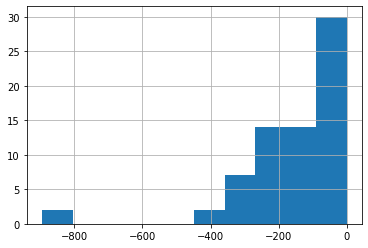

In [256]:
valid_table_QB['delta_yards'].hist()

In [257]:
valid_table_QB.sort_values(['Yds'], ascending = False)

,play_maker,pass_yards,playmaker_team,reception_yards,run_yards,position,Att,Cmp,Yds,TD,Int,delta_yards
39,J.Winston,4831.0,TB,0.0,266.0,QB,626.0,380.0,5109.0,33.0,30.0,-278.0
23,D.Prescott,4753.0,DAL,0.0,287.0,QB,596.0,388.0,4902.0,30.0,11.0,-149.0
34,J.Goff,4468.0,LA,0.0,53.0,QB,626.0,394.0,4638.0,22.0,16.0,-170.0
59,P.Rivers,4395.0,LAC,0.0,30.0,QB,591.0,390.0,4615.0,23.0,20.0,-220.0
53,M.Ryan,4152.0,ATL,0.0,156.0,QB,616.0,408.0,4466.0,26.0,14.0,-314.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40,Jos.Allen,662.0,BUF,0.0,100.0,QB,NaN,NaN,NaN,NaN,NaN,NaN
62,R.Griffin III,151.0,BAL,0.0,57.0,QB,NaN,NaN,NaN,NaN,NaN,NaN
73,G.Bradbury,0.0,NaN,-4.0,0.0,QB,NaN,NaN,NaN,NaN,NaN,NaN
74,K.McGary,0.0,NaN,-3.0,0.0,QB,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_RB = df_RB.rename(columns = {'Player': 'play_maker'})

RB_table = final_merged[final_merged['position'] == 'RB']

valid_table_RB = RB_table.merge(df_RB[["play_maker", "Att", "Yds", "TD"]], on = 'play_maker', how = 'outer')

valid_table_RB['delta_yards'] = valid_table_RB['run_yards'] - valid_table_RB['Yds'] 

valid_table_RB

,play_maker,pass_yards,playmaker_team,reception_yards,run_yards,position,Att,Yds,TD,delta_yards
0,A.Kamara,13.0,NO,533.0,797.0,RB,171.0,797.0,5.0,0.0
1,B.Hundley,38.0,ARI,0.0,44.0,RB,7.0,41.0,0.0,3.0
2,B.Powell,0.0,NYJ,33.0,229.0,RB,59.0,229.0,0.0,0.0
3,C.McCaffrey,0.0,CAR,1005.0,1389.0,RB,287.0,1387.0,15.0,2.0
4,K.Barner,3.0,ATL,22.0,28.0,RB,4.0,28.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
363,D.Vitale,NaN,NaN,NaN,NaN,NaN,1.0,3.0,0.0,NaN
364,G.Ward,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.0,NaN
365,T.Wesco,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN
366,M.Williams,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN


In [259]:
df_WR = df_WR.rename(columns = {'Player': 'play_maker'})

WR_table = final_merged[final_merged['position'] == 'WR/TE']

valid_table_WR = WR_table.merge(df_WR[["play_maker", "Tgt", "Rec", "Yds", "TD"]], on = 'play_maker', how = 'outer')

valid_table_WR['delta_yards'] = valid_table_WR['reception_yards'] - valid_table_WR['Yds'] 

valid_table_WR

,play_maker,pass_yards,playmaker_team,reception_yards,run_yards,position,Tgt,Rec,Yds,TD,delta_yards
0,A.Beck,6.0,DEN,90.0,3.0,WR/TE,12.0,9.0,90.0,1.0,0.0
1,A.Erickson,26.0,CIN,529.0,33.0,WR/TE,78.0,43.0,529.0,0.0,0.0
2,A.Wilson,10.0,MIA,351.0,45.0,WR/TE,62.0,43.0,351.0,1.0,0.0
3,C.Kupp,0.0,LA,1161.0,4.0,WR/TE,134.0,94.0,1161.0,10.0,0.0
4,C.Sutton,38.0,DEN,1112.0,17.0,WR/TE,124.0,72.0,1112.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
713,S.Perry,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,NaN
714,B.Scarbrough,NaN,NaN,NaN,NaN,NaN,4.0,1.0,5.0,0.0,NaN
715,W.Teller,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-5.0,0.0,NaN
716,D.Watson,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6.0,1.0,NaN


In [39]:
play_type = input('Play_type: ')


if(play_type == 'Rush'):
    df_RB = df_RB.rename(columns = {'Player': 'play_maker'})
    key = 'RB'
    stat_list = ["play_maker", "Att", "Yds", "TD"]
    ref_table = df_RB
elif(play_type == 'Pass'):      
    df_QB = df_QB.rename(columns = {'Player': 'play_maker'})
    key = 'QB'
    stat_list = ["play_maker", "Att", "Cmp", "Yds", "TD", "Int"]
    ref_table = df_QB
elif(play_type == 'Reception'):      
    df_WR = df_WR.rename(columns = {'Player': 'play_maker'})
    key = 'WR/TE'
    stat_list = ["play_maker", "Tgt", "Rec", "Yds", "TD"]
    ref_table = df_WR
    
table = final_merged[final_merged['position'] == key]
valid_table = table.merge(ref_table[stat_list], on = 'play_maker', how = 'outer')

valid_table


Play_type: Rush


,play_maker,pass_yards,playmaker_team,reception_yards,run_yards,position,Att,Yds,TD
0,A.Kamara,13.0,NO,533.0,797.0,RB,171.0,797.0,5.0
1,B.Hundley,38.0,ARI,0.0,44.0,RB,7.0,41.0,0.0
2,B.Powell,0.0,NYJ,33.0,229.0,RB,59.0,229.0,0.0
3,C.McCaffrey,0.0,CAR,1005.0,1389.0,RB,287.0,1387.0,15.0
4,K.Barner,3.0,ATL,22.0,28.0,RB,4.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...
363,D.Vitale,NaN,NaN,NaN,NaN,NaN,1.0,3.0,0.0
364,G.Ward,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.0
365,T.Wesco,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0
366,M.Williams,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0
